# Visualizing **Categorical** data (Case-Study)

In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn style theme to our preference
sns.set(style='white')

# read some data
market_df = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/global_sales_data/market_fact.csv")
cust_df = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/global_sales_data/cust_dimen.csv")
product_df = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/global_sales_data/prod_dimen.csv")
shipping_df = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/global_sales_data/shipping_dimen.csv")
orders_df = pd.read_csv("/home/vinayak/vDataScience/Datasets/Datavisual/global_sales_data/orders_dimen.csv")

#### Boxplots
We had created simple boxplots such as the ones shown below. Now, let's plot multiple boxplots and see what they can tell us the distribution of variables across categories.

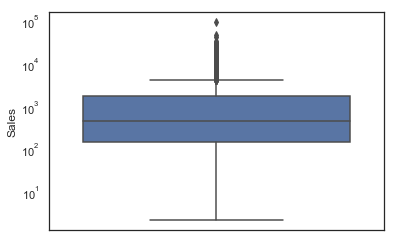

In [2]:
# boxplots of a variable
sns.boxplot(y=market_df['Sales'])
plt.yscale('log')  # since sales columns has a lot of outliers(log helps to visualize)
plt.show()

Now, let's say you want to **compare the (distribution of) sales of various product categories**. Let's first merge the product data into the main dataframe.

In [3]:
# Merge the dataframe to add a categorical variable
df = pd.merge(market_df, product_df, how = 'inner', on = 'Prod_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


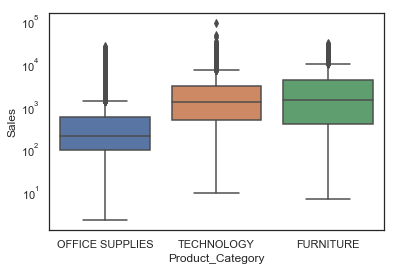

In [4]:
# boxplot of a variable across various product categories
sns.boxplot(x = 'Product_Category', y = 'Sales', data = df)
plt.yscale('log')
plt.show()

The boxplot tells us that the sales of ```OFFICE SUPPLIES``` are, on an average, lower than the other two categories. The sales of ```TECHNOLOGY``` and ```FURNITURE``` categories seem much better. Note that each order can have multiple units of products sold, so ```Sales``` being higher/lower may be due to price per unit or the number of units.

Let's now plot the other important variable - `Profit`

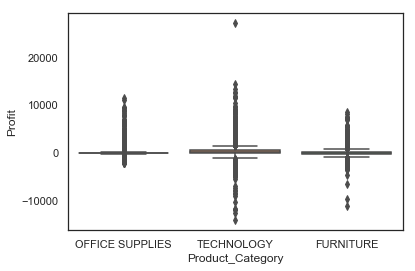

In [5]:
# boxplot of a variable across various product categories
sns.boxplot(x = 'Product_Category', y = 'Profit', data = df)
plt.show()

`Profit` column has some **outliers** due to which the boxplots are unintelligible. Let's remove some extreme values from the Profit (for the purpose of visualization) and plot it once again.

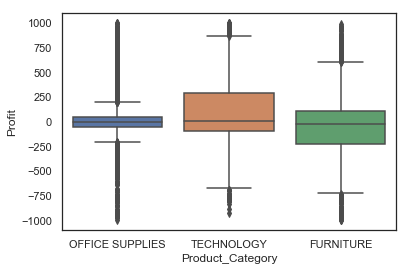

In [6]:
# to remove extreme values from dataframe we will put forth some Conditions (Trim the dataframe)
df = df[(df.Profit <1000) & (df.Profit > -1000)]

# boxplot of a variable across various product categories
sns.boxplot(x='Product_Category', y='Profit', data=df)
plt.show()

We can see that though the category `TECHNOLOGY` has better sales numbers than others, `FURNITURE` category where the most loss making transactions happen. We can drill further down into this.

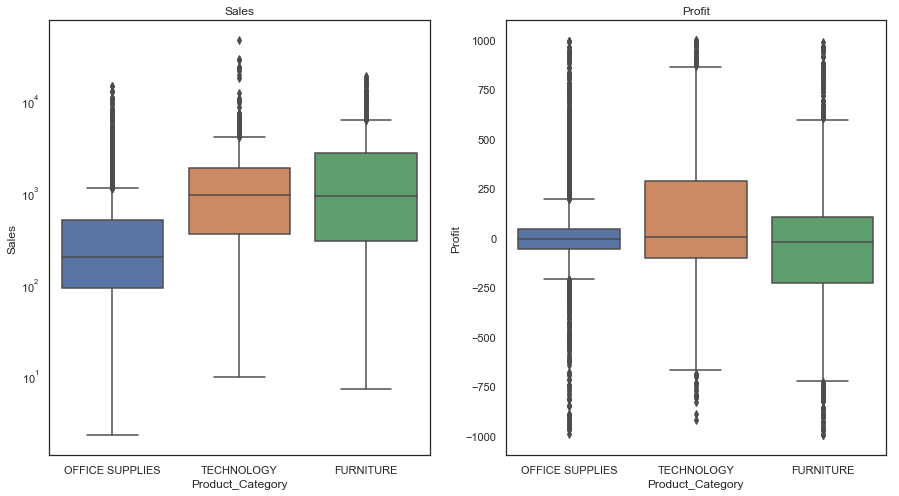

In [7]:
# adjust figure size
plt.figure(figsize=(15, 8))

# subplot 1
plt.subplot(1, 2, 1)
sns.boxplot(x='Product_Category', y='Sales', data=df)
plt.title("Sales")
plt.yscale('log')

# subplot 2
plt.subplot(1, 2, 2)
sns.boxplot(x='Product_Category', y='Profit', data=df)
plt.title("Profit")

plt.show()

Now that we have compared Sales and Profit across product categories. Let's drill down further and do the same across another categorical variable - **Customer_Segment**.

We will need to add the customer-related attributes(dimensions) to this dataframe.

In [8]:
# merging with cust_df
df = pd.merge(df, cust_df, how='inner', on='Cust_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE


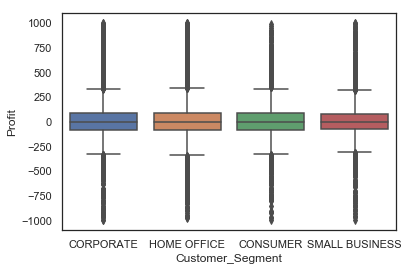

In [9]:
# boxplot of a variable across various product categories
sns.boxplot(x='Customer_Segment', y='Profit', data=df)
plt.show()

We can **visualize the distribution across two Categorical variables** using the ```hue=``` argument.

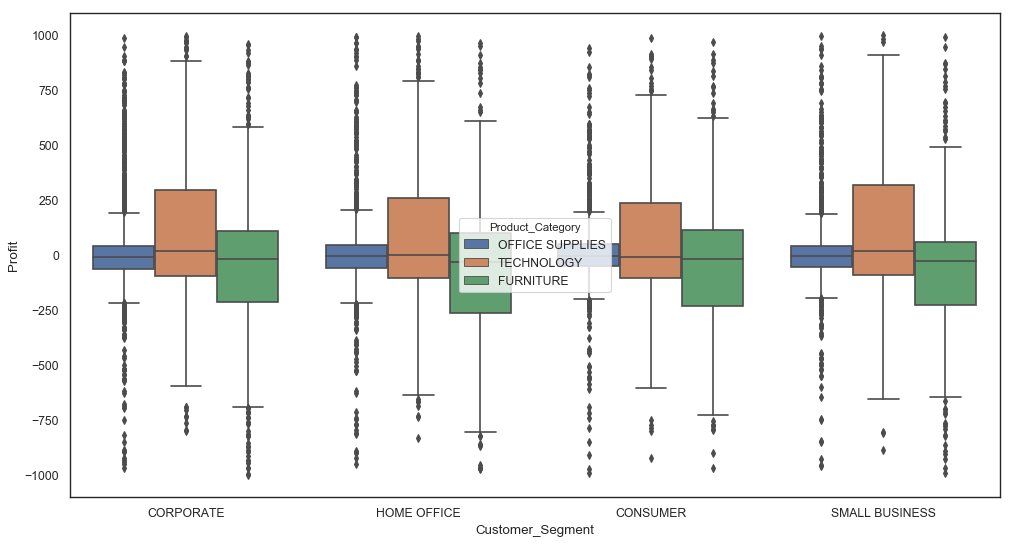

In [10]:
# set the figure size for larger figure
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

# specify ```hue="categorical_variable"```
sns.boxplot(x="Customer_Segment", y="Profit", hue="Product_Category", data=df)
plt.show()

Across all the customer segments, the product category Technology seems to be profitable, though Furniture is incurring losses across all the segments.

Now, say you are curious to know why certain orders are making huge losses. One of your hypothesis is that the shipping cost is too high in some orders. You can plot **Derived variables** as well, such as shipping cost as percentage of sales amount.

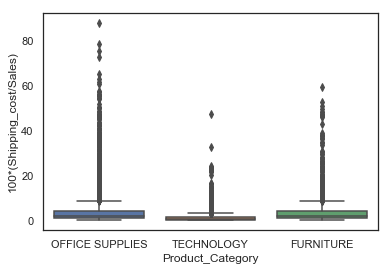

In [11]:
# plot shipping cost as percentage of Sales amount
sns.boxplot(x=df['Product_Category'], y=100*df['Shipping_Cost']/df['Sales'])
plt.ylabel("100*(Shipping_cost/Sales)")
plt.show()

So this is how as a **Data Scientist** you need to keep experimenting, hypothesize, make certain observations and detect hidden or obscure evidence/information which will help us make better business decisions or come to conclusions. These plots helps us to understand different aspects of the data we are working on.

### Plotting Aggregated Values across Categories

#### Bar Plots - Mean, Median and Count Plots

Bar plots are used to **display aggregated values** of a variable, rather than entire distributions. This is especially useful when you have a lot of data which is difficult to visualize in a single figure.

For example, say you want to visualize and compare the average(Mean) Sales across Product Categories. The ```sns.barplot()``` function can be used. 

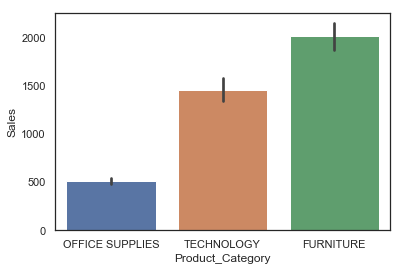

In [12]:
# Bar plot with default statistics = mean (by default mean is used in this function)
sns.barplot(x='Product_Category', y='Sales', data=df)
plt.show()

Note that, **by default Seaborn plots the MEAN values across categories**. though we can plot the **COUNT, MEDIAN, SUM** etc. Also, barplot computes and shows the **Confidence Interval** of the Mean as well.

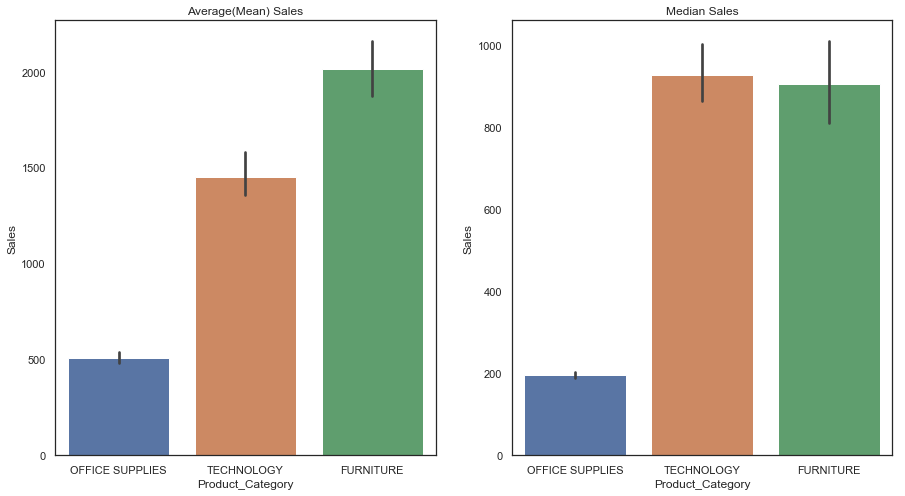

In [13]:
# Bar plot - Mean and Median
plt.figure(figsize=(15, 8))

# Mean default
plt.subplot(1, 2, 1)
sns.barplot(x=df['Product_Category'], y=df['Sales'])
plt.title("Average(Mean) Sales")

# Median
plt.subplot(1, 2, 2)
sns.barplot(x=df['Product_Category'], y=df['Sales'], estimator=np.median)
plt.title("Median Sales")

plt.show()

Look at that! The Mean and Median Sales across the product categories tell different stories. This is because of some outliers in the Furniture category, distorting the value of the mean.

We can add another categorical variable in the plot.

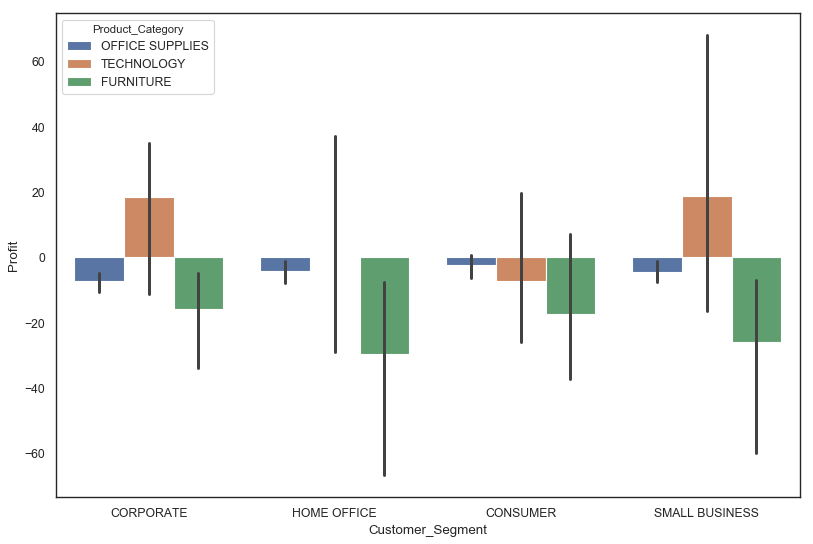

In [14]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x=df['Customer_Segment'], y=df['Profit'], hue=df['Product_Category'], estimator=np.median)
plt.show()

The plot neatly shows the median profit across product categories and customer segments. It says that:

- On an average, only Technology products in Small Business and Corporate (customer) categories are profitable.
- Furniture is incurring losses across all the customer segments

Compare this to the boxplot we had created above - though the bar plots contain 'lesser information' than the boxplot, it is more revealing.




When you want to visualize having a large number of categories. It is helpful to plot the categories across the y-axis. Let's now drill down into product sub categories.

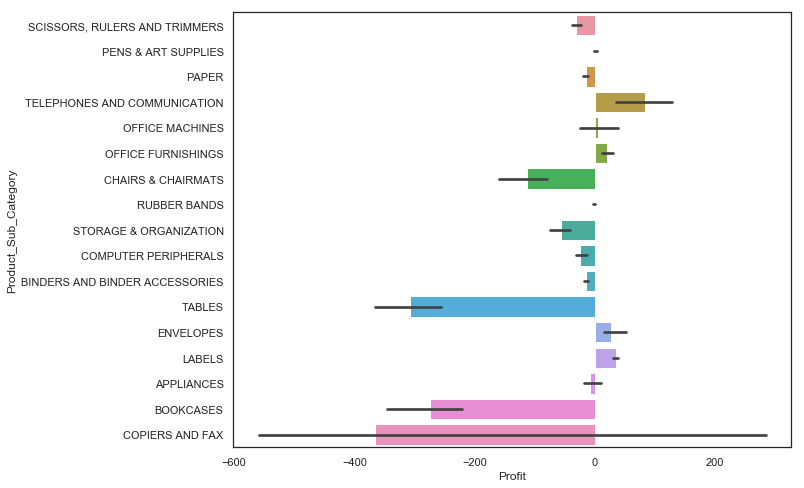

In [15]:
# plotting categorical variables across the y-axis
plt.figure(figsize=(10, 8))
sns.barplot(x='Profit', y='Product_Sub_Category', data=df, estimator=np.median)
plt.show()

The plot clearly shows which sub categories are incurring the heaviest losses - Copiers and Fax, Tables, Chairs and Chairmats are the most loss making categories.

You can also plot the count of the observations across categorical variables using ```sns.countplot()```.

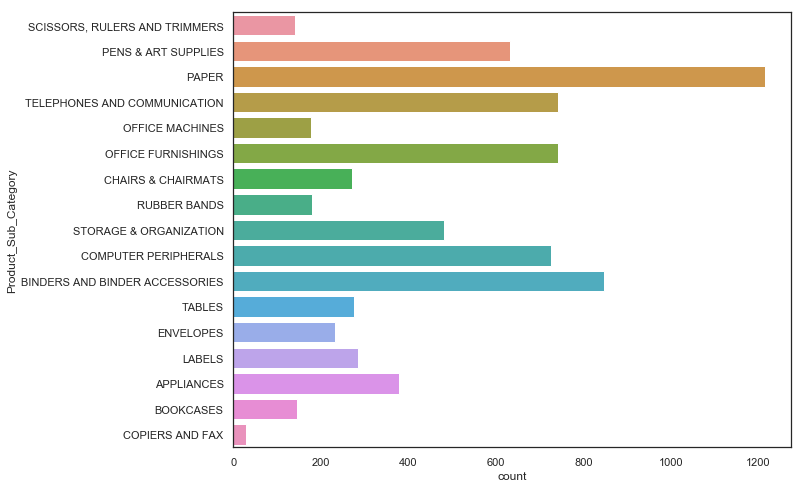

In [16]:
# Count plot across a categorical variable
plt.figure(figsize=(10, 8))
sns.countplot(y='Product_Sub_Category', data=df)
plt.show()

Note the most loss making category - Copiers and Fax has a very few number of orders.